# Batch Inference pipeline Production notebook

##### Since this is a production notebook, and `'hopsworks'` is a part of `requirements.txt` we comment it here to save resources while it runs after deployment.

In [ ]:
# !pip install -U hopsworks --quiet

### Imports and connceting to hopsworks

In [14]:
import hopsworks
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
project = hopsworks.login()

fs = project.get_feature_store()
mr = project.get_model_registry()

Connected. Call `.close()` to terminate connection gracefully.
Connection closed.
Copy your Api Key (first register/login): https://c.app.hopsworks.ai/account/api/generated

Paste it here: ··········
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/3342


Connected. Call `.close()` to terminate connection gracefully.
Connected. Call `.close()` to terminate connection gracefully.


In [4]:
# Again print statements are not needed in production

start_date = (datetime.datetime.now() - datetime.timedelta(hours=24)) 
end_date = (datetime.datetime.now()) 
# print(start_date)
# print(end_date)

2022-11-24 12:05:39.211336
2022-11-25 12:05:39.211457


In [5]:
# Again print statements are not needed in production

feature_view = fs.get_feature_view("cc_trans_fraud", 1)

feature_view.init_batch_scoring(training_dataset_version=1)
# print(feature_view.get_batch_query())

WITH right_fg0 AS (SELECT *
FROM (SELECT `fg2`.`tid` `tid`, `fg2`.`datetime` `datetime`, `fg2`.`cc_num` `join_pk_cc_num`, `fg2`.`datetime` `join_evt_datetime`, `fg0`.`cc_num` `cc_num`, `fg0`.`category` `category`, `fg0`.`amount` `amount`, `fg0`.`age_at_transaction` `age_at_transaction`, `fg0`.`days_until_card_expires` `days_until_card_expires`, `fg0`.`loc_delta_t_minus_1` `loc_delta_t_minus_1`, `fg0`.`time_delta_t_minus_1` `time_delta_t_minus_1`, RANK() OVER (PARTITION BY `fg2`.`cc_num`, `fg2`.`datetime` ORDER BY `fg0`.`datetime` DESC) pit_rank_hopsworks
FROM `data_featurestore`.`transactions_fraud_label_2` `fg2`
INNER JOIN `data_featurestore`.`cc_trans_fraud_2` `fg0` ON `fg2`.`cc_num` = `fg0`.`cc_num` AND `fg2`.`datetime` >= `fg0`.`datetime`) NA
WHERE `pit_rank_hopsworks` = 1), right_fg1 AS (SELECT *
FROM (SELECT `fg2`.`tid` `tid`, `fg2`.`datetime` `datetime`, `fg2`.`cc_num` `join_pk_cc_num`, `fg2`.`datetime` `join_evt_datetime`, `fg1`.`trans_volume_mstd` `trans_volume_mstd`, `fg1`.`t

In [6]:
# Similarly, commenting out the code for displaying 'transactions_df'

transactions_df = feature_view.get_batch_data(start_time = start_date, end_time = end_date)
# transactions_df

,tid,datetime,cc_num,category,amount,age_at_transaction,days_until_card_expires,loc_delta_t_minus_1,time_delta_t_minus_1,trans_volume_mstd,trans_volume_mavg,trans_freq,loc_delta_mavg
0,6d921df1558ac9c879d280c5a00b9440,1669314228000,4003456744416606,2,0.003136,0.345287,0.486068,0.020461,0.000491,0.008212,0.008022,0.008022,0.168670
1,4b1d8dcbfe2eaa62b95121c422ab5ed6,1669316570000,4003456744416606,2,0.002331,0.345288,0.486055,0.048383,0.000405,0.004642,0.004451,0.004451,0.152929
2,f8e5f7ad8db821e1e359cd12f9ff4c3b,1669325664000,4003456744416606,2,0.001540,0.345291,0.486004,0.042695,0.000988,0.018166,0.017978,0.017978,0.198112
3,9b125992051f1d0afc47a1a7085e8f33,1669327784000,4003456744416606,2,0.000990,0.345292,0.485992,0.000000,0.004691,0.003766,0.003576,0.003576,0.126429
4,144888dbab2f94ca75c407d9d103138a,1669354519000,4003456744416606,4,0.003218,0.345302,0.485842,0.000000,0.001052,0.006051,0.005861,0.005861,0.148592
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48188,36ea60319f2f58ade2a2d6573127d73f,1669341362000,4999661259770133,6,0.002510,0.947853,0.427579,0.123913,0.002048,0.007250,0.007060,0.007060,0.110262
48189,191261f052dd8812641d61c916766b2c,1669291720000,4999763787658689,2,0.001474,0.793891,0.383134,0.076071,0.000497,0.003443,0.003252,0.003252,0.228203
48190,fb99d815dbcf1ac67a03e3dbae59883d,1669324030000,4999763787658689,2,0.003028,0.793903,0.382952,0.114123,0.000048,0.006267,0.006077,0.006077,0.135532
48191,bbafba7179e69513162271051006b810,1669330636000,4999763787658689,2,0.001110,0.793906,0.382915,0.054840,0.000511,0.003837,0.003646,0.003646,0.113927


In [7]:
# Again for 'features_df'

features_df = transactions_df.iloc[: , 3:]
# features_df

,category,amount,age_at_transaction,days_until_card_expires,loc_delta_t_minus_1,time_delta_t_minus_1,trans_volume_mstd,trans_volume_mavg,trans_freq,loc_delta_mavg
0,2,0.003136,0.345287,0.486068,0.020461,0.000491,0.008212,0.008022,0.008022,0.168670
1,2,0.002331,0.345288,0.486055,0.048383,0.000405,0.004642,0.004451,0.004451,0.152929
2,2,0.001540,0.345291,0.486004,0.042695,0.000988,0.018166,0.017978,0.017978,0.198112
3,2,0.000990,0.345292,0.485992,0.000000,0.004691,0.003766,0.003576,0.003576,0.126429
4,4,0.003218,0.345302,0.485842,0.000000,0.001052,0.006051,0.005861,0.005861,0.148592
...,...,...,...,...,...,...,...,...,...,...
48188,6,0.002510,0.947853,0.427579,0.123913,0.002048,0.007250,0.007060,0.007060,0.110262
48189,2,0.001474,0.793891,0.383134,0.076071,0.000497,0.003443,0.003252,0.003252,0.228203
48190,2,0.003028,0.793903,0.382952,0.114123,0.000048,0.006267,0.006077,0.006077,0.135532
48191,2,0.001110,0.793906,0.382915,0.054840,0.000511,0.003837,0.003646,0.003646,0.113927


In [8]:
import joblib

the_model = mr.get_model("cc_fraud", version=1)
model_dir = the_model.download()

model = joblib.load(model_dir + "/cc_fraud_model.pkl")

### Making Predictions using the model saved in model registry

In [9]:
predictions = model.predict(features_df)
# predictions

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
transactions_df['prediction'] = predictions.tolist()
results_df = transactions_df.copy()[["tid", "cc_num", "datetime", "prediction"]]
results_df.loc[:,'batch_start_date'] = start_date
# results_df

,tid,cc_num,datetime,prediction,batch_start_date
0,6d921df1558ac9c879d280c5a00b9440,4003456744416606,1669314228000,0,2022-11-24 12:05:39.211336
1,4b1d8dcbfe2eaa62b95121c422ab5ed6,4003456744416606,1669316570000,0,2022-11-24 12:05:39.211336
2,f8e5f7ad8db821e1e359cd12f9ff4c3b,4003456744416606,1669325664000,0,2022-11-24 12:05:39.211336
3,9b125992051f1d0afc47a1a7085e8f33,4003456744416606,1669327784000,0,2022-11-24 12:05:39.211336
4,144888dbab2f94ca75c407d9d103138a,4003456744416606,1669354519000,0,2022-11-24 12:05:39.211336
...,...,...,...,...,...
48188,36ea60319f2f58ade2a2d6573127d73f,4999661259770133,1669341362000,0,2022-11-24 12:05:39.211336
48189,191261f052dd8812641d61c916766b2c,4999763787658689,1669291720000,0,2022-11-24 12:05:39.211336
48190,fb99d815dbcf1ac67a03e3dbae59883d,4999763787658689,1669324030000,0,2022-11-24 12:05:39.211336
48191,bbafba7179e69513162271051006b810,4999763787658689,1669330636000,0,2022-11-24 12:05:39.211336


### Creating a Feature Group for results

In [12]:
results_fg = fs.get_or_create_feature_group(
    name="cc_fraud_results",
    version=1,
    description="Number of predicted frauds by card",
    primary_key=["cc_num"],
    event_time="datetime"
)
results_fg.insert(results_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/3342/fs/3289/fg/6554


Uploading Dataframe: 0.00% |          | Rows 0/48193 | Elapsed Time: 00:00 | Remaining Time: ?

Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/3342/jobs/named/cc_fraud_results_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x7f1918b6c110>, None)

In [13]:
results_df.loc[:,'batch_end_date'] = end_date
# results_df

,tid,cc_num,datetime,prediction,batch_start_date,batch_end_date
0,6d921df1558ac9c879d280c5a00b9440,4003456744416606,1669314228000,0,2022-11-24 12:05:39.211336,2022-11-25 12:05:39.211457
1,4b1d8dcbfe2eaa62b95121c422ab5ed6,4003456744416606,1669316570000,0,2022-11-24 12:05:39.211336,2022-11-25 12:05:39.211457
2,f8e5f7ad8db821e1e359cd12f9ff4c3b,4003456744416606,1669325664000,0,2022-11-24 12:05:39.211336,2022-11-25 12:05:39.211457
3,9b125992051f1d0afc47a1a7085e8f33,4003456744416606,1669327784000,0,2022-11-24 12:05:39.211336,2022-11-25 12:05:39.211457
4,144888dbab2f94ca75c407d9d103138a,4003456744416606,1669354519000,0,2022-11-24 12:05:39.211336,2022-11-25 12:05:39.211457
...,...,...,...,...,...,...
48188,36ea60319f2f58ade2a2d6573127d73f,4999661259770133,1669341362000,0,2022-11-24 12:05:39.211336,2022-11-25 12:05:39.211457
48189,191261f052dd8812641d61c916766b2c,4999763787658689,1669291720000,0,2022-11-24 12:05:39.211336,2022-11-25 12:05:39.211457
48190,fb99d815dbcf1ac67a03e3dbae59883d,4999763787658689,1669324030000,0,2022-11-24 12:05:39.211336,2022-11-25 12:05:39.211457
48191,bbafba7179e69513162271051006b810,4999763787658689,1669330636000,0,2022-11-24 12:05:39.211336,2022-11-25 12:05:39.211457


In [16]:
unique, counts = np.unique(predictions, return_counts=True)
# print(np.asarray((unique, counts)).T)
# print(counts[1])

[[    0 48190]
 [    1     3]]
3


In [17]:
data = {'datetime': [start_date], 'num_predicted_fraud': [counts[1]]}
df = pd.DataFrame.from_dict(data)

### Writing the number of credit card frauds into another feature group

In [18]:
fraud_fg = fs.get_or_create_feature_group(
    name="predicted_fraud",
    version=1,
    description="Number of predicted frauds by day",
    primary_key=["datetime"],
    event_time="datetime"
)
fraud_fg.insert(df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/3342/fs/3289/fg/6557


Uploading Dataframe: 0.00% |          | Rows 0/1 | Elapsed Time: 00:00 | Remaining Time: ?

Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/3342/jobs/named/predicted_fraud_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x7f191a130250>, None)

### Creating a graph of the number of suspected fraudulent transactions over time
First, reading up all the historical suspected fraudulent transactions

In [19]:
history_df = fraud_fg.read()
# Sorting the historical fraud predictions by day
history_df = history_df.sort_values(by = ['datetime'])  
# history_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             1 non-null      datetime64[ns]
 1   num_predicted_fraud  1 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 24.0 bytes


In [20]:
history_df['day_of_year'] = history_df['datetime'].dt.dayofyear 
# history_df

,datetime,num_predicted_fraud,day_of_year
0,2022-11-24 12:05:39.211,3,328


<Figure size 864x504 with 0 Axes>

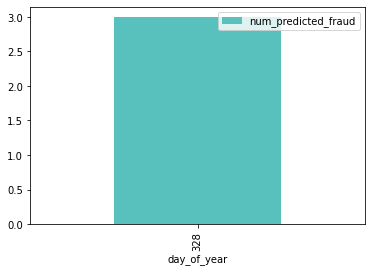

In [24]:
color='#59C1BD'
plt.figure(figsize=(12, 7))

history_df.plot(kind='bar', x='day_of_year', y='num_predicted_fraud', color=color)

plt.savefig("fraud_counts.png")
plt.show()

plt.close()